In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

path = "../data/processed_data.csv"
data = pd.read_csv(path)
data["date"] = pd.to_datetime(data["date"])  # Convert column to datetime

Pie charts visualizing the most listened to artists overall and for the current month and year.

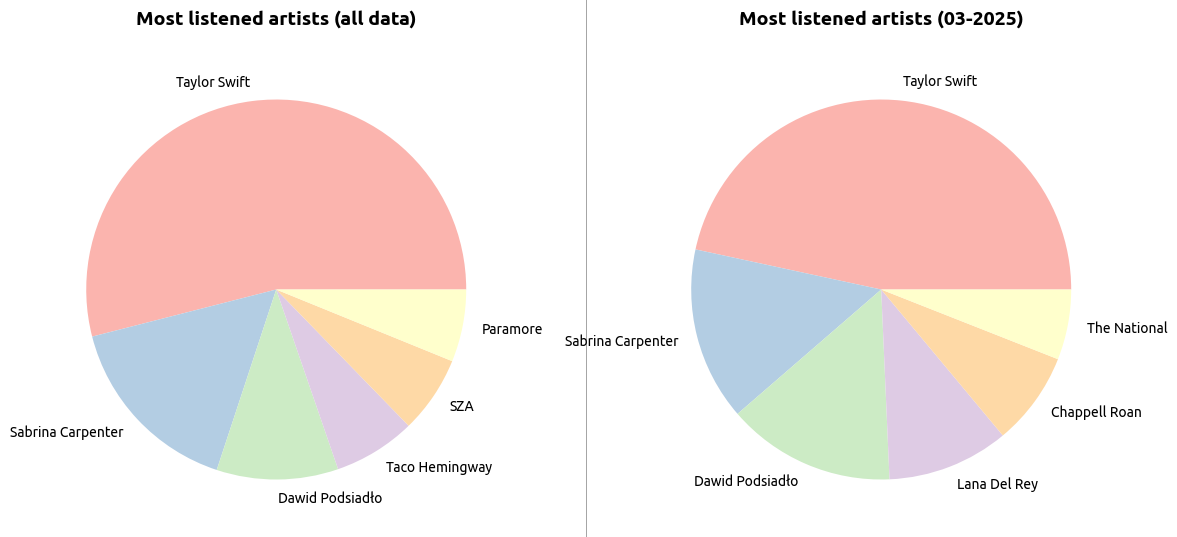

In [22]:
num_of_artists = 6  # How many top artists should show up on the graph
month = date.today().month  # Displays the data for this month (1-12)
year = date.today().year  # Displays the data for this year


def most_listened_artists_chart(df, num_of_artists, ax=None, month=None, year=None):
    if month is not None and year is not None:
        df = df[(df["date"].dt.month == month) & (df["date"].dt.year == year)]

    df = df[["artist", "title"]].groupby(by="artist").count()  # Group the data by artist and get the count
    df.rename(columns={"title": "count"}, inplace=True)  # Rename the column to count
    df = df.sort_values(by="count", ascending=False)  # Sort by count descending
    df = df.head(num_of_artists)  # Get the top most listened artists

    listening_count = df["count"]
    labels = df.index

    plt.rcParams["font.family"] = "Ubuntu"

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.pie(
        x=listening_count, 
        labels=labels,
        textprops={"fontsize": 10},
        colors=sns.color_palette("Pastel1")
    )

    date_range = f"{month:02}-{year}" if (month and year) else "all data"
    ax.set_title(
        f"Most listened artists ({date_range})",
        fontdict={"fontsize": 14, "fontweight": "bold"},
        pad=20
    )


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

most_listened_artists_chart(data, num_of_artists, ax=axes[0])
most_listened_artists_chart(data, num_of_artists, ax=axes[1], month=month, year=year)

# Add a vertical line separator
plt.plot([0.5, 0.5], [0, 1], color="grey", lw=0.5, transform=plt.gcf().transFigure, clip_on=False)

plt.tight_layout()
plt.show()

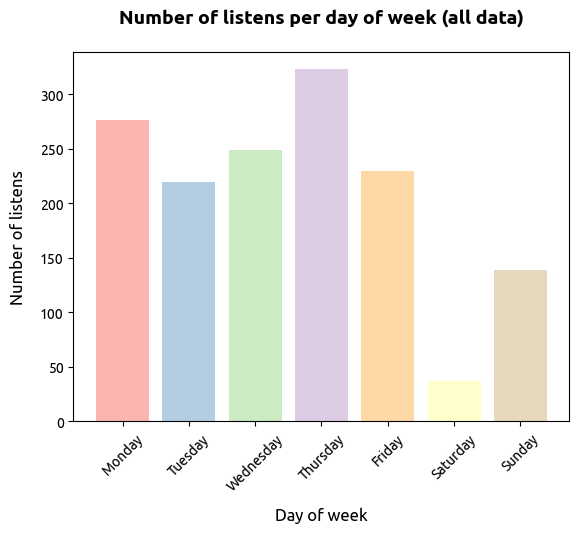

In [24]:
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

days_of_week = data["day_of_week"].value_counts().sort_index()
days_of_week.index = days_of_week.index.map(day_labels)  # Map the index to day labels

plt.rcParams["font.family"] = "Ubuntu"
plt.bar(days_of_week.index, days_of_week, color=sns.color_palette("Pastel1"))

plt.title("Number of listens per day of week (all data)", fontdict={"fontsize": 14, "fontweight": "bold"}, pad=20)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Day of week", fontsize=12, labelpad=10)
plt.ylabel("Number of listens", fontsize=12, labelpad=10)
plt.show()